In [1]:
# Import required libraries

from sklearn.datasets import load_iris

from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd

In [2]:
# Load the Iris dataset

iris = load_iris()

X = iris.data

y_true = iris.target

In [3]:
# Create a DataFrame including actual labels for reference

df = pd.DataFrame(X, columns=iris.feature_names)

df['Actual_Label'] = y_true

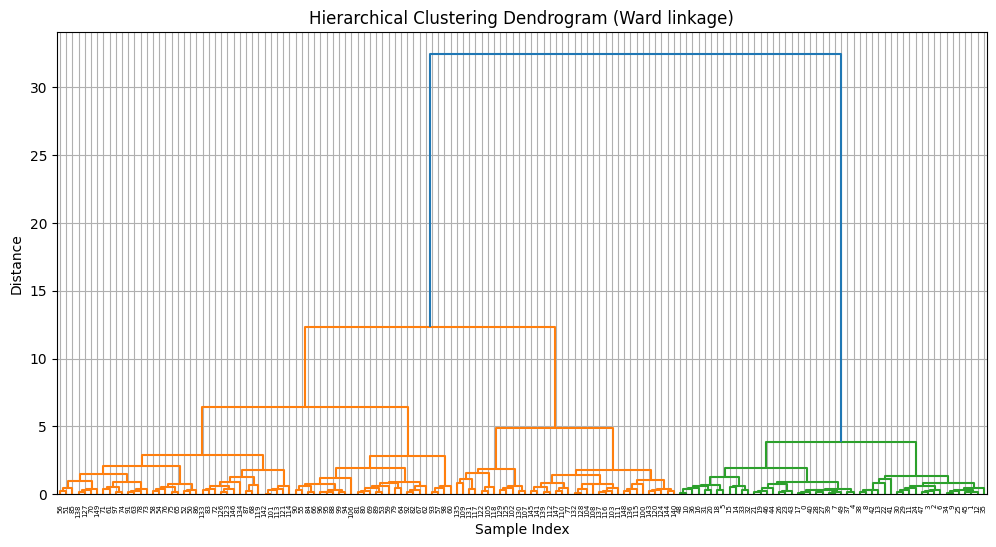

In [4]:
# Step 1: Plot the Dendrogram using Ward linkage

plt.figure(figsize=(12, 6))

linked = linkage(X, method='ward')  # Ward linkage minimizes variance

dendrogram(linked,

           orientation='top',

           distance_sort='descending',

           show_leaf_counts=True)

plt.title('Hierarchical Clustering Dendrogram (Ward linkage)')

plt.xlabel('Sample Index')

plt.ylabel('Distance')

plt.grid(True)

plt.show()

In [5]:
# Step 2: Apply Agglomerative Clustering

k = 3  # Desired number of clusters

hc = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')

df['Cluster_Label'] = hc.fit_predict(X)

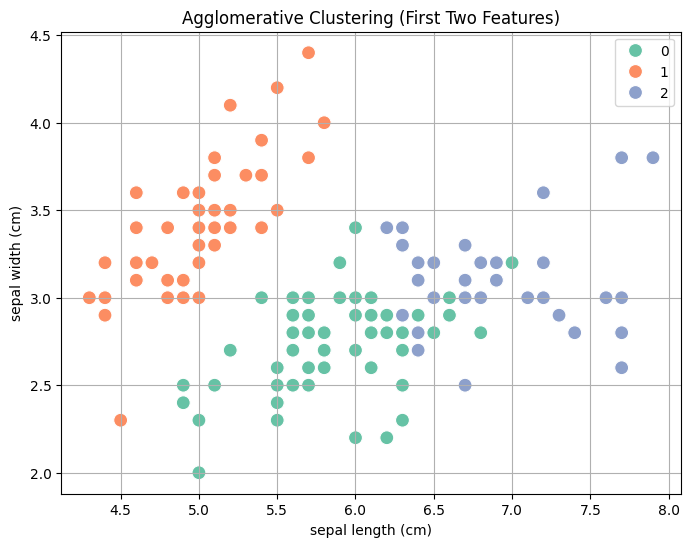

In [6]:
# Step 3: Visualize clusters on first two features

plt.figure(figsize=(8, 6))

sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=df['Cluster_Label'], palette='Set2', s=100)

plt.title('Agglomerative Clustering (First Two Features)')

plt.xlabel(iris.feature_names[0])

plt.ylabel(iris.feature_names[1])

plt.grid(True)

plt.legend()

plt.show()